In [2]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt

### Desenhando retângulos como bounding boxes

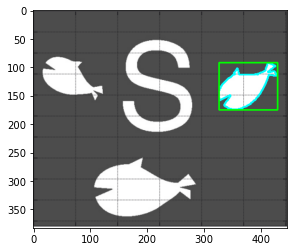

In [3]:
img = cv.imread('shark.png')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Aplica thresholding na imagem para criar uma binária
ret,thresh = cv.threshold(gray,127,255,0)

# Encontra os contornos dos objetos
contours, _ = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

# Pega o segundo contorno
cnt = contours[1]
# Computa a fronteira do primeiro contorno
x,y,w,h = cv.boundingRect(cnt)

# Desenha o contorno na imagem
img = cv.drawContours(img,[cnt],0,(0,255,255),2)
# Desenha o retângulo da fronteira
img = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# mostra a imagem com o retângulo desenhado
plt.imshow(img)

### Criando bounding boxes rotacionadas e elipses para os contornos

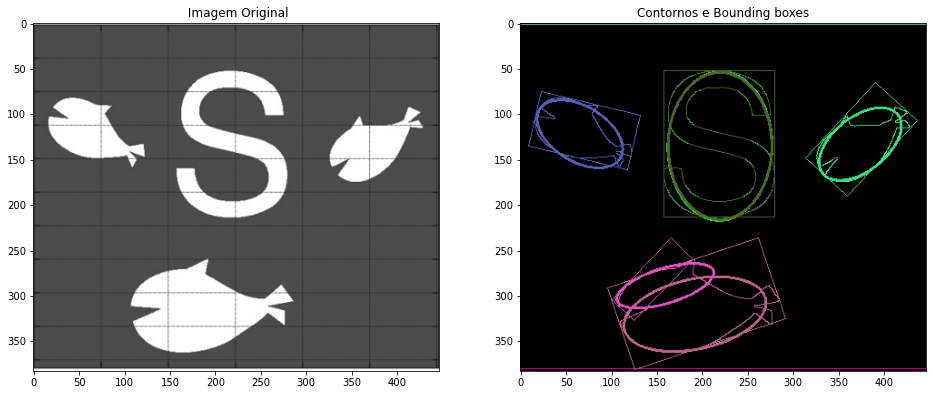

In [15]:
rng.seed(12345)

def thresh_callback(val):
    threshold = val
    # Detecta as bordas com o algoritmo Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Encontra os contornos
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Encontrando os retângulos rotacionados e as elipses para cada contorno
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)
            
    # Desenha os contornos, retângulos e elipses
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    for i, c in enumerate(contours):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contorno
        cv.drawContours(drawing, contours, i, color)
        # elipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # retângulo rotacionado
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Inteiro usado para indexar
        cv.drawContours(drawing, [box], 0, color)
       
    # retorna o desenho
    return drawing
    
src = cv.imread("shark.png")
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))

thresh = 202 # Limiar que ficou melhor para separar os objetos
drawing = thresh_callback(thresh)

# Mostra as imagens
fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(src)
ax[0].set_title(' Imagem Original')
ax[1].imshow(drawing)
ax[1].set_title('Contornos e Bounding boxes');

### Momentos

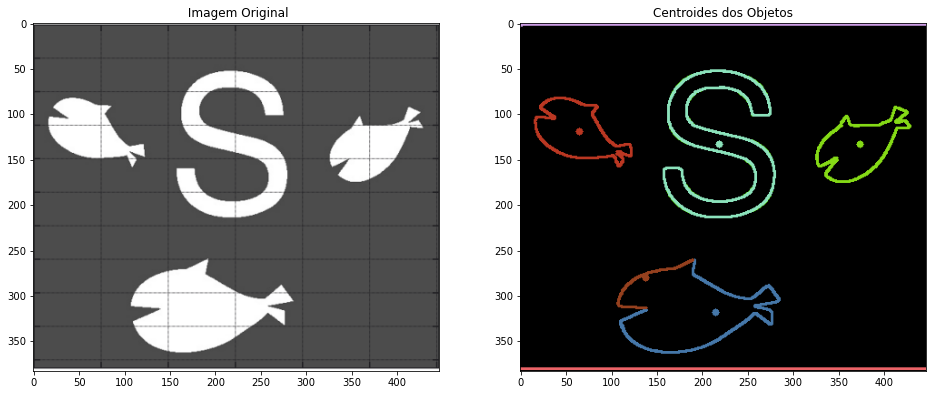

In [20]:
def momento_callback(val):
    threshold = val
    # Detecta as bordas com o algoritmo Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Encontra os contornos
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Encontra os momentos
    mu = [None]*len(contours)
    for i in range(len(contours)):
        mu[i] = cv.moments(contours[i])
        
    # Pega os centros de massa
    mc = [None]*len(contours)
    for i in range(len(contours)):
        # adiciona 1e-5 para evitar divisão por zero
        mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
        
    # Desenha os contornos
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color, 2)
        cv.circle(drawing, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)
    return drawing

drawing = momento_callback(thresh)

# Mostra as imagens
fig1, ax1 = plt.subplots(1,2, figsize=(16,12))
ax1[0].imshow(src)
ax1[0].set_title(' Imagem Original')
ax1[1].imshow(drawing)
ax1[1].set_title('Centroides dos Objetos');